## Project Outline

- This Dataset contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .
- We will build multiple models like Simple RNN, LSTM, GRU. And compare various Model's Accuracy Score and the precit on some random text.

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
tweet_df = pd.read_csv('Data/twitter_project.csv', encoding='ISO-8859-1', header=None).sample(frac=0.10).reset_index()

In [4]:
tweet_df

,index,0,1,2,3,4,5
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn down
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,@ddlovato Demiiii!!! Teen Choice awards?!?! W...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,"@tommcfly Oun, Tom You OK? haha"
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,@codywilbanks sorry for your loss.
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,"@myfizzypop I am quite distraught about this, ..."
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,is suffering from backache.
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,Sandi's flooding my multiply albums with her c...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,@Dyana_ Thanx I'm glad that u were glad for me...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today!!! so excited and later pic...


In [5]:
tweet_df.columns = ['index','sentiment', 'id', 'date', 'query', 'user_name', 'tweet']

In [6]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn down
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,@ddlovato Demiiii!!! Teen Choice awards?!?! W...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,"@tommcfly Oun, Tom You OK? haha"
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,@codywilbanks sorry for your loss.
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,"@myfizzypop I am quite distraught about this, ..."
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,is suffering from backache.
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,Sandi's flooding my multiply albums with her c...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,@Dyana_ Thanx I'm glad that u were glad for me...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today!!! so excited and later pic...


In [6]:
tweet_df.drop(['index','id', 'date', 'query', 'user_name'], inplace=True, axis=1)

In [7]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn down
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,@ddlovato Demiiii!!! Teen Choice awards?!?! W...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,"@tommcfly Oun, Tom You OK? haha"
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,@codywilbanks sorry for your loss.
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,"@myfizzypop I am quite distraught about this, ..."
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,is suffering from backache.
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,Sandi's flooding my multiply albums with her c...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,@Dyana_ Thanx I'm glad that u were glad for me...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today!!! so excited and later pic...


In [8]:
tweet_df.sentiment.value_counts()

sentiment
4    80211
0    79789
Name: count, dtype: int64

### Data Visualisation

<AxesSubplot:xlabel='sentiment', ylabel='count'>

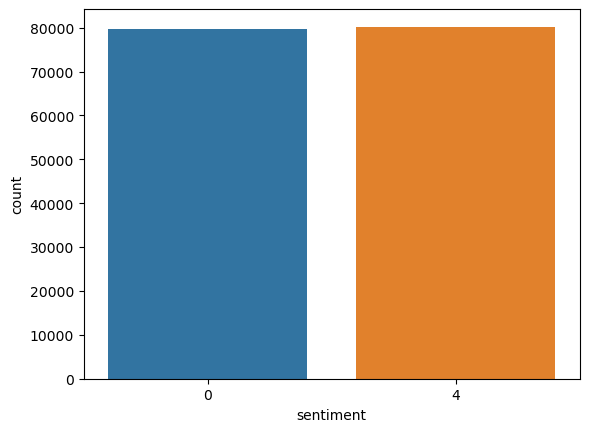

In [9]:
sns.countplot(data=tweet_df, x='sentiment')

### Data Cleaning

Generally Tweets contain numbers, punctuations, different type of stem words, stopwords. And sentences also needs to be divided into words and into numeric in a list for processing data into model. So Data Cleaning for this type of data is very important and necessary.

In [10]:
import nltk
from nltk.tokenize import word_tokenize  # Split sentence into words and keep those words in form of a list

In [11]:
text_1 = tweet_df['tweet'][0]
print(text_1)

print(word_tokenize(text_1))

torn down 
['torn', 'down']


In [12]:
corpus=[]
for text in tweet_df['tweet']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [13]:
num_words=len(corpus)
print(num_words)

160000


In [14]:
tweet_df.shape

(160000, 7)

In [15]:
tweet_df['tweet']=tweet_df['tweet'].str.lower()

In [16]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn down
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,@ddlovato demiiii!!! teen choice awards?!?! w...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,"@tommcfly oun, tom you ok? haha"
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,@codywilbanks sorry for your loss.
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,"@myfizzypop i am quite distraught about this, ..."
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,is suffering from backache.
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,sandi's flooding my multiply albums with her c...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,@dyana_ thanx i'm glad that u were glad for me...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today!!! so excited and later pic...


In [17]:
from nltk.corpus import stopwords
stpwrds = stopwords.words('english')
len(stpwrds)

179

In [18]:
# Removing stopwords from the review column
tweet_df['tweet']=tweet_df['tweet'].apply(lambda x:" ".join(word for word in x.split() if word not in stpwrds))

In [19]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,@ddlovato demiiii!!! teen choice awards?!?! wo...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,"@tommcfly oun, tom ok? haha"
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,@codywilbanks sorry loss.
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,"@myfizzypop quite distraught this, thought wou..."
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,suffering backache.
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,sandi's flooding multiply albums comments! oh ...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,@dyana_ thanx i'm glad u glad story heartwarmi...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today!!! excited later picking ca...


In [20]:
import string # special operations on strings like removing the punctuations from the sentences
def remove_punc(text):
    no_punc= text.translate(str.maketrans('', '', string.punctuation))
    return no_punc

In [21]:
tweet_df['tweet']=tweet_df['tweet'].apply(remove_punc)

In [22]:
tweet_df

,index,sentiment,id,date,query,user_name,tweet
0,726519,0,2262592484,Sat Jun 20 22:49:27 PDT 2009,NO_QUERY,Blonde36,torn
1,1542658,4,2181126046,Mon Jun 15 11:24:10 PDT 2009,NO_QUERY,MartinaEfron,ddlovato demiiii teen choice awards wooow im s...
2,718644,0,2260354167,Sat Jun 20 19:04:56 PDT 2009,NO_QUERY,danicastr,tommcfly oun tom ok haha
3,184889,0,1967828662,Fri May 29 20:17:01 PDT 2009,NO_QUERY,missioncuracao,codywilbanks sorry loss
4,647146,0,2236687962,Fri Jun 19 04:18:25 PDT 2009,NO_QUERY,JamesLeon1,myfizzypop quite distraught this thought would...
...,...,...,...,...,...,...,...
159995,276863,0,1991132925,Mon Jun 01 06:28:03 PDT 2009,NO_QUERY,kookijhe,suffering backache
159996,1290214,4,2002711715,Tue Jun 02 04:58:13 PDT 2009,NO_QUERY,_jev,sandis flooding multiply albums comments oh mi...
159997,1318728,4,2014401758,Wed Jun 03 01:24:38 PDT 2009,NO_QUERY,Shoko_RDJ,dyana thanx im glad u glad story heartwarming ...
159998,1048413,4,1960144867,Fri May 29 07:29:44 PDT 2009,NO_QUERY,LoloJ256,sister comes today excited later picking cap g...


### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
tweet_df['sentiment']=en.fit_transform(tweet_df['sentiment'])

In [25]:
tweet_df = tweet_df.drop(['index', 'id', 'date', 'query', 'user_name'], axis=1)
tweet_df

,sentiment,tweet
0,0,torn
1,1,ddlovato demiiii teen choice awards wooow im s...
2,0,tommcfly oun tom ok haha
3,0,codywilbanks sorry loss
4,0,myfizzypop quite distraught this thought would...
...,...,...
159995,0,suffering backache
159996,1,sandis flooding multiply albums comments oh mi...
159997,1,dyana thanx im glad u glad story heartwarming ...
159998,1,sister comes today excited later picking cap g...


### Splitting the Data

In [26]:
x = tweet_df['tweet']
y = tweet_df['sentiment']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
train_size = int(tweet_df.shape[0]*0.8)
x_train = tweet_df['tweet'][:train_size]
y_train = tweet_df['sentiment'][:train_size]

x_test = tweet_df['tweet'][train_size:]
y_test = tweet_df['sentiment'][train_size:]

In [29]:
train_size, x_train.shape, y_train.shape, x_test.shape, y_test.shape

(128000, (128000,), (128000,), (32000,), (32000,))

### Tokenizing & Padding

In [30]:
from keras.preprocessing.text import Tokenizer  # Converts words into numeric values
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Equals all the sentences by filling 0

2023-05-13 22:53:39.126344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = 30, truncating = 'post', padding='post')

In [32]:
x_train[1], len(x_train[1])

(array([  562, 33525,  3297,  1244,   637,  6316,     1,   342,    53,
           40,  1285,   840,    43,   610,    40,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0], dtype=int32),
 30)

In [33]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen = 30, truncating = 'post', padding='post')

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((128000, 30), (128000,), (32000, 30), (32000,))

### LSTM Model Building

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout

In [36]:
lstm_model =  Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=100, input_length=30, trainable=True))
lstm_model.add(LSTM(100, dropout=0.1, return_sequences=True))
lstm_model.add(LSTM(100, dropout=0.1))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

2023-05-13 22:55:12.731729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 22:55:12.736061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 22:55:12.739692: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           16000000  
                                                                 
 lstm (LSTM)                 (None, 30, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 16,160,901
Trainable params: 16,160,901
Non-trainable params: 0
_________________________________________________________________


2023-05-13 22:55:13.214313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 22:55:13.217224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 22:55:13.219687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Compile & Fit the Model

In [37]:
lstm_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [39]:
history = lstm_model.fit(x_train, y_train, epochs=100, batch_size=256, 
              validation_data=(x_test, y_test), callbacks=early_stopping, verbose=True)

Epoch 1/100


2023-05-13 22:55:28.727775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 22:55:28.731260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 22:55:28.735217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - ETA: 0s - loss: 0.5382 - accuracy: 0.7141

2023-05-13 23:00:35.178236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 23:00:35.181993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 23:00:35.184181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 [==============================] - 320s 628ms/step - loss: 0.5382 - accuracy: 0.7141 - val_loss: 0.4920 - val_accuracy: 0.7677
Epoch 2/100
500/500 [==============================] - 315s 630ms/step - loss: 0.3760 - accuracy: 0.8348 - val_loss: 0.5533 - val_accuracy: 0.7523
Epoch 3/100
500/500 [==============================] - 318s 636ms/step - loss: 0.2398 - accuracy: 0.9012 - val_loss: 0.6678 - val_accuracy: 0.7404
Epoch 4/100
500/500 [==============================] - 314s 628ms/step - loss: 0.1630 - accuracy: 0.9349 - val_loss: 0.7575 - val_accuracy: 0.7395
Epoch 5/100
500/500 [==============================] - 317s 633ms/step - loss: 0.1204 - accuracy: 0.9513 - val_loss: 0.9788 - val_accuracy: 0.7347
Epoch 6/100
500/500 [==============================] - 316s 632ms/step - loss: 0.0949 - accuracy: 0.9609 - val_loss: 0.9798 - val_accuracy: 0.7290
Epoch 6: early stopping


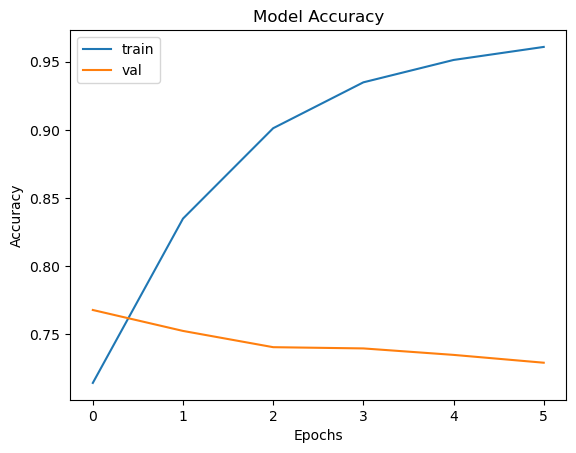

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

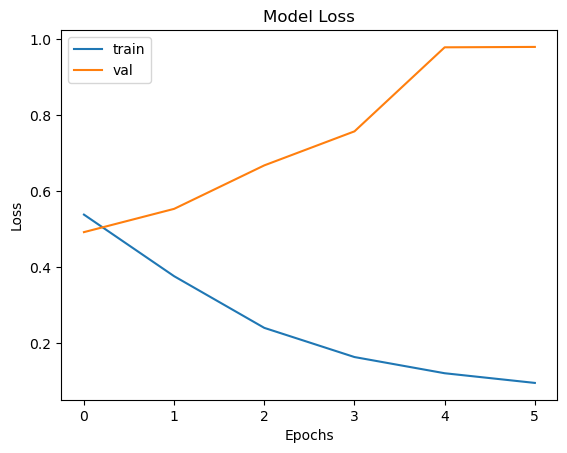

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
lstm_model.evaluate(x_test, y_test)

2023-05-13 23:27:08.784559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 23:27:08.788172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 23:27:08.790955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1000/1000 [==============================] - 23s 21ms/step - loss: 0.9798 - accuracy: 0.7290


[0.9798044562339783, 0.7289687395095825]

So we got 72.90% Test Accuracy with LSTM Model.

### GRU Building Model

In [43]:
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=100, input_length=30, trainable=True))
gru_model.add(GRU(100, dropout=0.1, return_sequences=True))
gru_model.add(GRU(100, dropout=0.1))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = gru_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

2023-05-13 23:28:16.539424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 23:28:16.545141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 23:28:16.548964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-13 23:28:17.043443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 23:28:17.047154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 23:28:17.050478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1000/1000 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5057

2023-05-13 23:35:44.756660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-13 23:35:44.761326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-13 23:35:44.763943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1000/1000 [==============================] - 460s 454ms/step - loss: 0.6907 - accuracy: 0.5057 - val_loss: 0.5944 - val_accuracy: 0.6918
Epoch 2/10
1000/1000 [==============================] - 453s 453ms/step - loss: 0.5072 - accuracy: 0.7526 - val_loss: 0.4895 - val_accuracy: 0.7684
Epoch 3/10
1000/1000 [==============================] - 452s 452ms/step - loss: 0.3266 - accuracy: 0.8604 - val_loss: 0.5589 - val_accuracy: 0.7500
Epoch 4/10
1000/1000 [==============================] - 453s 453ms/step - loss: 0.1880 - accuracy: 0.9241 - val_loss: 0.6454 - val_accuracy: 0.7439
Epoch 5/10
1000/1000 [==============================] - 454s 454ms/step - loss: 0.1188 - accuracy: 0.9517 - val_loss: 0.7936 - val_accuracy: 0.7333
Epoch 6/10
1000/1000 [==============================] - 460s 460ms/step - loss: 0.0867 - accuracy: 0.9650 - val_loss: 0.9339 - val_accuracy: 0.7291
Epoch 7/10
1000/1000 [==============================] - 571s 571ms/step - loss: 0.0682 - accuracy: 0.9722 - val_loss: 1.073

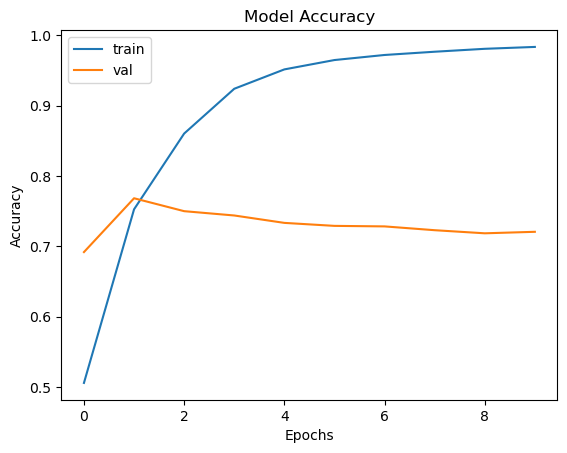

In [47]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

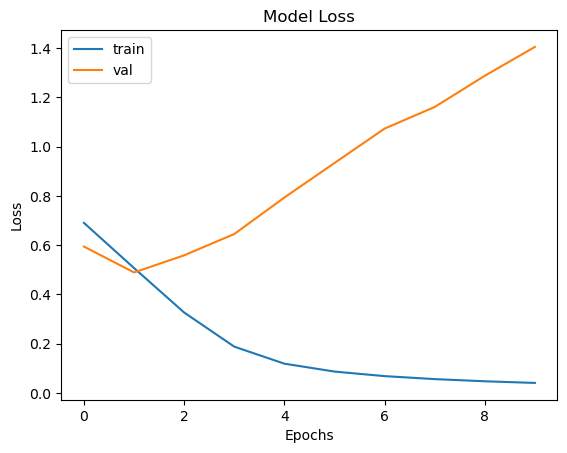

In [48]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
gru_model.evaluate(x_test, y_test)

2023-05-14 00:46:55.970166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-14 00:46:55.973653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-14 00:46:55.976794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1000/1000 [==============================] - 16s 15ms/step - loss: 1.4054 - accuracy: 0.7207


[1.4053900241851807, 0.7206562757492065]

GRU Model gives 72.06%, almost same as LSTM Model